/Users/nategruver/opt/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


dict_keys(['test_loss', 'train_loss', 'complexity', 'equation', 'test_preds', 'train_preds', 'nll', 'train_x', 'train_y', 'test_x', 'test_y'])


/var/folders/4z/0371zfqj5mx0rlct4r3qclfm0000gn/T/ipykernel_84748/3016424578.py:64: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for legobj in leg.legendHandles:


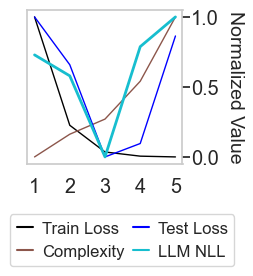

In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict

sns.set(style="whitegrid", font_scale=1.3)

pkl_fn = "../precomputed_outputs/simplicity_bias/simplicity_bias_results.pkl"
with open(pkl_fn, 'rb') as f:
    results = pickle.load(f)

print(results.keys())
test_losses = results['test_loss']
nlls = results['nll']
complexities = results['complexity']
train_losses = results['train_loss']
equations = results['equation']
train_preds = results['train_preds']
test_preds = results['test_preds']

train_x = results['train_x']
train_y = results['train_y']
test_x = results['test_x']
test_y = results['test_y']

test_losses = np.array(test_losses)
test_losses = (test_losses - test_losses.min()) / (test_losses.max() - test_losses.min())
nlls = np.array(nlls)
nlls = (nlls - nlls.min()) / (nlls.max() - nlls.min())
complexities = np.array(complexities)
complexities = (complexities - complexities.min()) / (complexities.max() - complexities.min())
train_losses = np.array(train_losses)
train_losses = (train_losses - train_losses.min()) / (train_losses.max() - train_losses.min())

fig, ax = plt.subplots(figsize=(2, 2))
ax.plot(train_losses, label='Train Loss', color='black', linewidth=1.)
ax.plot(complexities, label='Complexity', color='tab:brown', linewidth=1.)
ax.plot(test_losses, label='Test Loss', color='blue', linewidth=1.)
ax.plot(nlls, label='LLM NLL', color='tab:cyan', linewidth=2.)
# ax.set_ylim(0, 500)

ax.set_ylabel("Normalized Value", rotation=270, labelpad=18, fontsize=14)
#reduce y tick label pad
ax.tick_params(axis='y', which='major', pad=0)

#move y labels to the right
ax.yaxis.tick_right()
ax.yaxis.set_label_position("right")

# add two column legend above the figure
handles, labels = ax.get_legend_handles_labels()
leg = fig.legend(
    handles, labels,
    ncol=2,
    bbox_to_anchor=(1.2, -0.1),#1.08),
    columnspacing=0.5,
    handletextpad=0.5,
    handlelength=1.0,
    fontsize=12,
)

# set the linewidth of each legend object
for legobj in leg.legendHandles:
    legobj.set_linewidth(1.5)

#add xlabels for [1,2,3,4,5]
ax.set_xticks([0, 1, 2, 3, 4])
ax.set_xticklabels([1, 2, 3, 4, 5])

#turn off grid lines
ax.grid(False)

fig.savefig("outputs/simplicity_bias_plot.svg", bbox_inches='tight')
plt.show()
plt.close()

In [2]:
import pandas as pd

import sys
sys.path.append("..")
from data.synthetic import get_synthetic_datasets
from data.metrics import calculate_crps

datasets = get_synthetic_datasets()
nlls = defaultdict(dict)
crps = defaultdict(dict)
mae = defaultdict(dict)

for dsname,(train,test) in datasets.items():
    with open(f'../precomputed_outputs/synthetic/{dsname}.pkl','rb') as f:
        data_dict = pickle.load(f)

    for model_name,preds in data_dict.items():
        print(model_name)
        try: 
            if 'NLL/D' not in preds:
                continue
            nll = preds['NLL/D']
            if model_name=='text-davinci-003-tuned':
                model_name='GPT3'
            nlls[model_name][dsname] = nll
            test_values = test.values if isinstance(test,pd.Series) else test

            crps[model_name][dsname] = calculate_crps(test_values,preds['samples'].values[:10],5)
            tmae = np.abs(test_values-preds['median'].values).mean()/np.abs(test_values).mean()
            mae[model_name][dsname] = tmae
        except Exception as e:
            print(e)
        
data = []

for model_name in nlls:
    for dsname in nlls[model_name]:
        entry = {
            "model_name": model_name,
            "dataset_name": dsname,
            "nll": nlls[model_name][dsname],
            "mae": mae[model_name][dsname],
            "crps": crps[model_name][dsname],
        }
        data.append(entry)

# Convert the list of dictionaries to a DataFrame
result_df = pd.DataFrame(data)

arima
TCN
text-davinci-003
gp
arima
TCN
N-BEATS
N-HiTS
text-davinci-003
gp
arima
TCN
N-BEATS
N-HiTS
text-davinci-003
gp
arima
TCN
N-BEATS
N-HiTS
text-davinci-003
gp
arima
TCN
N-BEATS
N-HiTS
text-davinci-003
gp
arima
TCN
N-BEATS
N-HiTS
text-davinci-003
gp
arima
TCN
N-BEATS
N-HiTS
text-davinci-003
gp
arima
TCN
N-BEATS
N-HiTS
text-davinci-003
gp
arima
TCN
N-BEATS
N-HiTS
text-davinci-003
arima
arima
TCN
text-davinci-003
gp
arima
TCN
N-BEATS
N-HiTS
text-davinci-003


In [3]:
result_df = result_df[result_df['model_name'].isin(['arima', 'TCN', 'text-davinci-003'])]
result_df['dataset_name'].unique()

array(['exp', 'x_times_sine', 'linear', 'log', 'beat', 'square',
       'gaussian_wave', 'sigmoid', 'sine', 'sinc', 'xsin', 'linear_cos'],
      dtype=object)

/var/folders/4z/0371zfqj5mx0rlct4r3qclfm0000gn/T/ipykernel_84748/2245553083.py:109: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  plt.subplots_adjust(wspace=0, hspace=.5)


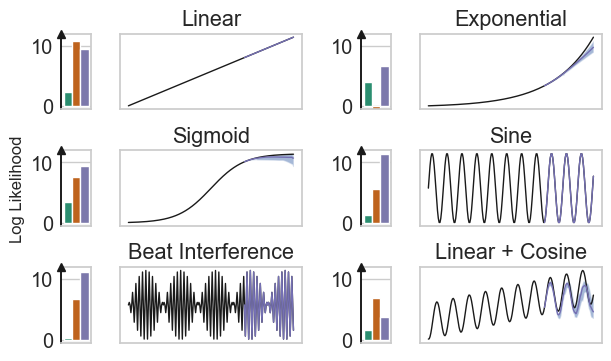

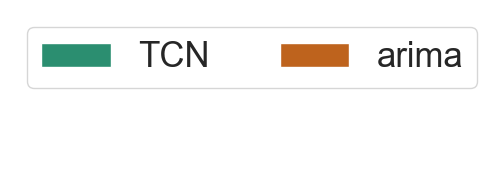

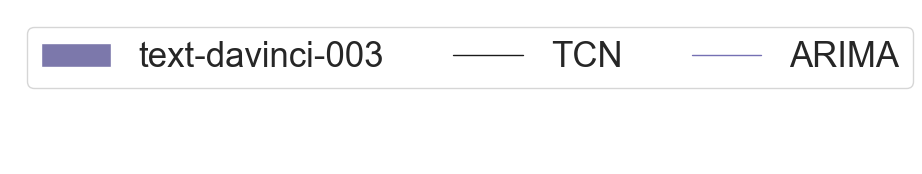

In [6]:
n_datasets = len(datasets)
n_cols = 7
n_rows = 3#(n_datasets + n_cols - 1) // n_cols
import seaborn as sns
sns.set(style="whitegrid", font_scale=1.3)
fig, axes = plt.subplots(
    n_rows, n_cols, 
    figsize=(6, 3.5), constrained_layout=True, #sharex=True,
    gridspec_kw={'width_ratios': [
        0.5, 0.2, 3, 0.2, 
        # 0.5, 0.2, 3, 0.2, 
        0.5, 0.2, 3
    ]} 
)
axes = axes.flatten()

dsname_map = {
    "linear": "Linear",#\n$(x_{t+1}=x_t+c)$",
    "exp": "Exponential",#\n($x_{t+1}=x_t \cdot c$)",
    "sigmoid": "Sigmoid",#\n($x_{t+1}=x_t + c x_t(1 - x_t)$)",
    "beat": "Beat Interference",#\n($x_t = x_{t - T}$)",
    "linear_cos": "Linear + Cosine",#\n($x_t=x_{t-T} + c$)",
    "x_times_sine": "Linear * Sine",
    "square": "Quadratic",
    "sine": "Sine",#\n($x_t = x_{t - T}$)",
}

result_df['ll'] = -1 * result_df['nll']

ax_idx = 0
# Iterate through the datasets and plot the samples
# dsnames = ['linear','exp','sigmoid','square','sine','beat','linear_cos','x_times_sine']
dsnames = ['linear','exp','sigmoid','sine','beat','linear_cos']
for idx, dsname in enumerate(dsnames):
    
    ax = axes[ax_idx]
    ax_idx += 1

    sns.barplot(
        x='dataset_name',
        # x='data_type',
        # order=['Trend', 'Periodic', 'Trend + Periodic'],
        y='ll',
        hue='model_name', 
        hue_order=['TCN', 'arima',  "text-davinci-003"],
        data=result_df[result_df['dataset_name'] == dsname], 
        ax=ax, 
        palette='Dark2',
    )
    ax.get_legend().remove()
    if idx % 2 != 0 or idx // 2 != 1:
        ax.set_ylabel("")
    else:
        ax.set_ylabel("Log Likelihood", fontsize=12)
    ax.yaxis.set_label_position("left")
    # ax.yaxis.tick_right()
    # ax.set_yticks([])
    ax.set_ylim((-0.5,12))
    ax.get_xaxis().set_visible(False)
    ax.tick_params(axis='y', which='major', pad=0)
    
    ax.spines['left'].set_color('black')
    ax.plot(0, 1, '^k', transform=ax.transAxes, clip_on=False, zorder=10)
    ax.margins(x=0.1)
    
    ax = axes[ax_idx]
    ax_idx += 1
    ax.set_axis_off()

    train,test = datasets[dsname]
    with open(f'../precomputed_outputs/synthetic/{dsname}.pkl','rb') as f:
        data_dict = pickle.load(f)
    
    ax = axes[ax_idx]
    ax_idx += 1
    if not 'text-davinci-003' in data_dict:
        continue
    samples = data_dict['text-davinci-003']['samples']
    lower = samples.quantile(0.1,axis=0)
    upper = samples.quantile(0.9,axis=0)
    
    # if dsname == "square":
    #     print(np.min(train.values), np.max(train.values))

    pred_color = sns.color_palette('Dark2')[2]
    ax.plot(pd.concat([train,test]),color='k',label='Ground Truth', linewidth=1)
    ax.fill_between(samples.iloc[0].index, lower, upper, alpha=0.5)
    ax.plot(data_dict['text-davinci-003']['median'], color=pred_color,label='GPT-3 Median', linewidth=1)
    #ax.plot(samples.T, alpha=0.5)
    ax.set_title(dsname_map[dsname])
    # turn off y axis
    ax.get_yaxis().set_visible(False)
    ax.get_xaxis().set_visible(False)
    if dsname == "square":
        ax.set_ylim((-0.05,1))

    if idx % 2 != 1:
        ax = axes[ax_idx]
        ax_idx += 1
        ax.set_axis_off()

handles, labels = axes[0].get_legend_handles_labels()
handles2, labels2 = axes[2].get_legend_handles_labels()
handles += handles2
labels += ['TCN', 'ARIMA', 'GPT-3']

plt.subplots_adjust(wspace=0, hspace=.5)

plt.savefig('outputs/synthetic_qualitative.pdf', dpi=300, bbox_inches='tight')
plt.savefig('outputs/synthetic_qualitative.png', dpi=300, bbox_inches='tight')
plt.show()


fig, ax = plt.subplots(1, 1, figsize=(2, 2))
ax.legend(
    handles=handles[:2],
    labels=labels[:2],
    markerscale=1.5,
    loc='upper left',
    fontsize=25,
    ncol=5,
    frameon=True
)

plt.axis("off")
plt.savefig('outputs/synthetic_qualitative_legend_1.pdf', bbox_inches='tight')
plt.show()

fig, ax = plt.subplots(1, 1, figsize=(2, 2))
ax.legend(
    handles=handles[2:],
    labels=labels[2:],
    markerscale=1.5,
    loc='upper left',
    fontsize=25,
    ncol=5,
    frameon=True
)

plt.axis("off")
plt.savefig('outputs/synthetic_qualitative_legend_2.pdf', bbox_inches='tight')
plt.show()